In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
from datetime import date
import matplotlib


In [2]:
port_test = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\portfolio test.xlsx",
                            parse_dates=['date'], index_col='date')
returns_test = port_test
port_test.head()

,A,B
date,,
2020-01-01,0.05,-0.09
2020-02-01,-0.08,0.02


In [3]:
GeoMeanReturns = ((port_test+1).prod())**(1/(len(port_test.index)))-1
GeoMeanReturns

A   -0.017147
B   -0.036569
dtype: float64

In [4]:
weights = [0.7, 0.3]
# Calculate expected portfolio performance
porTestReturn = np.sum(GeoMeanReturns*weights)
porTestReturn

-0.022973496714656927

In [5]:
GeoMeanReturns*weights

A   -0.012003
B   -0.010971
dtype: float64

In [6]:
# Create portfolio returns column
port_test['Portfolio']= port_test.dot(weights)
port_test['Portfolio']

date
2020-01-01    0.008
2020-02-01   -0.050
Name: Portfolio, dtype: float64

In [7]:
# Calculate cumulative returns
daily_cum_return=(1+returns_test).cumprod()
daily_cum_return

,A,B,Portfolio
date,,,
2020-01-01,1.050,0.9100,1.0080
2020-02-01,0.966,0.9282,0.9576


In [8]:
# Calculate expected portfolio performance
portReturn = np.sum(GeoMeanReturns*weights)
portReturn

-0.022973496714656927

In [9]:
# lets do with a bigger and more real data set

<AxesSubplot:xlabel='Date'>

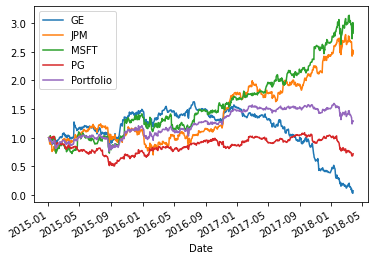

In [10]:
stock_returns = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\stock_returns.xlsx",
                             parse_dates=['Date'], index_col='Date')
stock_returns.plot()

In [11]:
# let calculate return from stock prices
data = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\stock_prices-4 company.xlsx",
                            parse_dates=['date'], index_col='date')
data.head()


,GE,GPM,MSF,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [12]:
# Calculate percentage returns
returns = data.pct_change()
returns.head()

,GE,GPM,MSF,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436


In [13]:
# Calculate individual mean returns 
GeoMeanDailyReturns = ((returns+1).prod())**(1/(len(data.index)-1))-1
GeoMeanDailyReturns

GE    -0.000767
GPM    0.000676
MSF    0.000799
PG    -0.000186
dtype: float64

In [14]:
weights = [0.5, 0.2, 0.2, 0.1]

In [15]:
# Create portfolio returns column
returns['Portfolio']= returns.dot(weights)
returns['Portfolio']

date
2015-01-02         NaN
2015-01-05   -0.017723
2015-01-06   -0.019328
2015-01-07    0.003579
2015-01-08    0.017518
                ...   
2018-03-21    0.005954
2018-03-22   -0.034077
2018-03-23   -0.022303
2018-03-26    0.015081
2018-03-27    0.010069
Name: Portfolio, Length: 813, dtype: float64

In [16]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
daily_cum_ret

,GE,GPM,MSF,PG,Portfolio
date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.981644,0.968955,0.990697,0.995245,0.982277
2015-01-06,0.960495,0.943831,0.976262,0.990712,0.963292
2015-01-07,0.960894,0.945271,0.988666,0.995909,0.966739
2015-01-08,0.972466,0.966395,1.017750,1.007298,0.983674
...,...,...,...,...,...
2018-03-21,0.553871,1.836134,1.977759,0.851835,0.974287
2018-03-22,0.532721,1.759482,1.920231,0.844870,0.941086
2018-03-23,0.521548,1.712434,1.864414,0.839341,0.920097


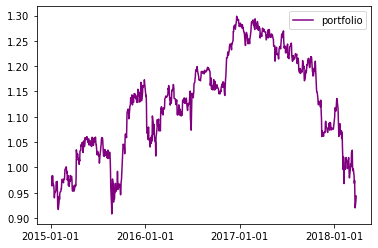

In [17]:
# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [18]:
# calculating the volatility of portfolio
# set new weights
# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

In [19]:
# Calculate the covariance matrix on daily returns
daily_returns = data.pct_change()
cov_matrix = (daily_returns.cov())*250
print (cov_matrix)

           GE       GPM       MSF        PG
GE   0.045987  0.022828  0.016285  0.010101
GPM  0.022828  0.046660  0.024135  0.010812
MSF  0.016285  0.024135  0.054054  0.014144
PG   0.010101  0.010812  0.014144  0.020645


In [20]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

2.55%


In [21]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(port_variance)

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

15.959999999999999%


In [22]:
daily_returns

,GE,GPM,MSF,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436
...,...,...,...,...
2018-03-21,0.017595,0.000872,-0.006979,-0.016218
2018-03-22,-0.038184,-0.041747,-0.029087,-0.008178
2018-03-23,-0.020974,-0.026739,-0.029068,-0.006544


In [23]:
# lets change the weights again and do the caluclations with new weight
weights = [0, 0.2, 0.7, 0.1]
# Create portfolio returns column
daily_returns['Portfolio']= daily_returns.dot(weights)
daily_returns['Portfolio']


date
2015-01-02         NaN
2015-01-05   -0.013196
2015-01-06   -0.015841
2015-01-07    0.009723
2015-01-08    0.026206
                ...   
2018-03-21   -0.006333
2018-03-22   -0.029528
2018-03-23   -0.026350
2018-03-26    0.059820
2018-03-27   -0.034245
Name: Portfolio, Length: 813, dtype: float64

In [24]:
daily_cum_ret=(1+daily_returns['Portfolio']).cumprod()
daily_cum_ret

date
2015-01-02         NaN
2015-01-05    0.986804
2015-01-06    0.971172
2015-01-07    0.980615
2015-01-08    1.006312
                ...   
2018-03-21    1.823639
2018-03-22    1.769790
2018-03-23    1.723157
2018-03-26    1.826236
2018-03-27    1.763697
Name: Portfolio, Length: 813, dtype: float64

In [25]:
initial_investment_in_portfolio = 101

# let calculate the cumulative value of portfolio with initial investment
pf_AUM = initial_investment_in_portfolio*daily_cum_ret
pf_AUM[0] = initial_investment_in_portfolio
pf_AUM

date
2015-01-02    101.000000
2015-01-05     99.667161
2015-01-06     98.088336
2015-01-07     99.042098
2015-01-08    101.637547
                 ...    
2018-03-21    184.187566
2018-03-22    178.748834
2018-03-23    174.038850
2018-03-26    184.449877
2018-03-27    178.133397
Name: Portfolio, Length: 813, dtype: float64

In [26]:
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]
total_return

0.7636969993537522

In [27]:
# Annualize return
# first we need to get the duration of our investment
months = 38
days_investment_term = len(pf_AUM.index)-1
annualized_return =  ((1 + total_return)**(12/months))-1
print(annualized_return)

0.196239386830515


In [28]:
total_return

0.7636969993537522

In [29]:
# Calculate total return and annualized return from price data
rfr = 0

total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(12/38))-1

# Create the returns data 
pf_returns = pf_AUM.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print (sharpe_ratio)

1.010287599748172


In [30]:
# lets compare our portfolio with sp500
sp500_value = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\sp500_value.xlsx",
                             parse_dates=['date'], index_col='date')
sp500_value

,sp500
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
...,...
2018-12-24,2351.100098
2018-12-26,2467.699951
2018-12-27,2488.830078


In [31]:
sp500_value.iloc[1]

sp500    2020.579956
Name: 2015-01-05 00:00:00, dtype: float64

In [32]:
# Calculate the total return from the S&P500 value series
sp500_total_return = (sp500_value.iloc[-1] - sp500_value.iloc[0]) / sp500_value.iloc[0]
sp500_total_return

sp500    0.217982
dtype: float64

In [33]:
# let's annualize sp500_total return
days_sp500_term = len(sp500_value.index)-1
sp500_annualized_return =  ((1 + sp500_total_return)**(252/days_sp500_term))-1
sp500_annualized_return

sp500    0.050689
dtype: float64

In [34]:
# set risk free rate
rfr = 0

# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(252)

# Calculate the Sharpe ratio 
sp500_sharpe_ratio = ((sp500_annualized_return - rfr) / vol_sp500)
print (sp500_sharpe_ratio)

sp500    0.370949
dtype: float64


In [35]:
# let's calculate the sharpe ratio of our portfoilo to compare it with market (sp500)

# Calculate annualized volatility from the standard deviation
vol_pf = (daily_returns['Portfolio'].std())*np.sqrt(252)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print (sharpe_ratio)

1.0062705357289916


In [36]:
# using standard deviation and return to assess portfolio is under this assumption that the return has a normal distributin
# in fact assuming normal distribution, we use mean and stdev as our expected retuen and expected volatility.
# but if it is not the case, meaning that the returns do not follow normal distribution, we can have cases where two
# different distributions have the same mean and standard deviation, but one of them is riskier than the other. 
# in this situation we need to dig deeper and calculate the skewness and kurtosis 
# Print the mean
print("mean_portfolio : ", daily_returns['Portfolio'].mean(), 
      "\n mean_sp500 : ", returns_sp500.mean())

# Print the standard deviation
print("vol_portfolio : ", daily_returns['Portfolio'].std(),
      "\n vol_sp500 : ", returns_sp500.std())

# Print the skewness
print("skewness_portfolio : ", daily_returns['Portfolio'].skew(),
      "\n skewness_sp500 : ", returns_sp500.skew())

# Print the kurtosis
print("kurtosis_portfolio : ", daily_returns['Portfolio'].kurtosis(),
      "\n kurtosis_sp500 : ", returns_sp500.kurtosis())

mean_portfolio :  0.0007742352765097255 
 mean_sp500 :  sp500    0.000233
dtype: float64
vol_portfolio :  0.012284886584255066 
 vol_sp500 :  sp500    0.008608
dtype: float64
skewness_portfolio :  0.24634690384169433 
 skewness_sp500 :  sp500   -0.420932
dtype: float64
kurtosis_portfolio :  6.651785261134709 
 kurtosis_sp500 :  sp500    3.91036
dtype: float64


In [37]:
# there are also another ways to measure the risk of equity:
# The Sortino ratio is just like the Sharpe ratio, except for that it uses the standard deviation of the negative 
# returns only(we can choose other ranges by defininf the value of target rate)
# and thereby focuses more on the downside of investing 

# as we want to define the downside as negative retrurns we set target rate to zero
target = 0

#Create a downside return column with the negative returns only (we did not annualized returns for simplicity and did not
# use geomean also for simplicity)
downside_returns = daily_returns.loc[daily_returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = daily_returns['Portfolio'].mean()
down_stdev = downside_returns['Portfolio'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  0.07742352765097255
Downside risk   :  0.8909195993692571
Sortino ratio :  0.08690293456983768


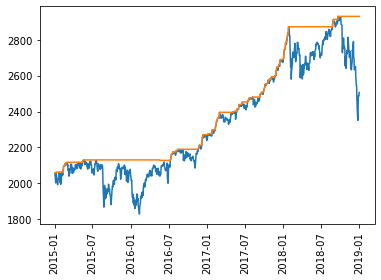

In [38]:
# In this exercise, you'll learn how to calculate the maximum draw-down of the S&P500 (also known as "peak to trough 
# performance drop"). Maximum draw-down is an incredibly insightful risk measure. It tells you what has been the worst
# performance of the S&P500 in the past years.
# It is the reason why many investors shy away from crypto-currencies; nobody likes to lose a large percentage of 
# their investment (e.g., 70%) in a short period.
# lets calculate it for sp500

# Calculate the max value 
roll_max = sp500_value.rolling(center=False,min_periods=1,window=252).max()

plt.plot(sp500_value)
plt.plot(roll_max)
plt.xticks(rotation=90)
plt.show()

In [39]:
# Calculate the daily draw-down relative to the max
daily_draw_down = sp500_value/roll_max - 1.0
daily_draw_down

,sp500
date,
2015-01-02,0.000000
2015-01-05,-0.018278
2015-01-06,-0.027009
2015-01-07,-0.015693
2015-01-08,0.000000
...,...
2018-12-24,-0.197782
2018-12-26,-0.157997
2018-12-27,-0.150787


In [40]:
# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()
max_daily_draw_down

,sp500
date,
2015-01-02,0.000000
2015-01-05,-0.018278
2015-01-06,-0.027009
2015-01-07,-0.027009
2015-01-08,-0.027009
...,...
2018-12-24,-0.197782
2018-12-26,-0.197782
2018-12-27,-0.197782


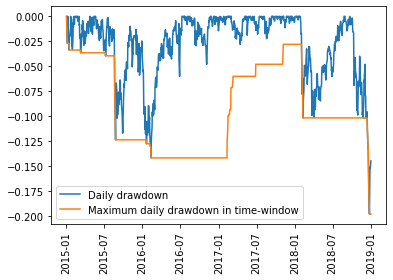

In [41]:
# Plot the results
plt.plot(daily_draw_down, label='Daily drawdown')
plt.plot(max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [42]:
# portfolio performance
# lets compare our portfolio with sp500
portfolio_data = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\portfolio_and_benchmark.xlsx"
                               ,index_col='ticker')
portfolio_data.head()

,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
ticker,,,,,,,
A,0.146146,0.035194,0.000,0.0,Agilent Technologies Inc,Health Care,Health Care Equipment
AAL,0.444411,0.094328,0.214,0.0,American Airlines Group,Industrials,Airlines
AAP,0.242189,0.029633,0.000,0.0,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AAPL,0.225074,0.027283,0.000,0.0,Apple Inc.,Information Technology,Computer Hardware
ABBV,0.182541,0.029926,0.000,0.0,AbbVie,Health Care,Pharmaceuticals


In [43]:
# Calculate return of the portfolio
total_return_pf = (portfolio_data['mean_return']*portfolio_data['pf_weights']).sum()
total_return_pf

33.134016088

In [44]:
# Calculate return of the benchmark
total_return_bm = (portfolio_data['bm_weights']*portfolio_data['mean_return']).sum()
total_return_bm

10.557641345

In [45]:
# Calculate and print the active return
active_return = total_return_pf - total_return_bm
print ("%.2f%%" % active_return)

22.58%


In [46]:
# Industry attribution
# In this exercise, you're going to calculate the relative industry position of your portfolio, versus a benchmark.
# As a portfolio manager you need to understand your portfolio's underweight and overweight positions (or "industry bets"),
# as they are a large driver of performance, as well as a potential source of risk.


# Group dataframe by GICS sectors 
grouped_df=portfolio_data.groupby('GICS Sector').sum()
grouped_df

,mean_return,variance,pf_weights,bm_weights
GICS Sector,,,,
Consumer Discretionary,14.091952,3.011994,32.426,12.169
Consumer Staples,5.131284,0.639847,24.551,29.727
Energy,3.390600,1.897643,0.000,0.000
Financials,8.701435,1.879874,0.000,2.116
Health Care,10.747579,2.349867,11.964,9.099
Industrials,11.336990,2.240227,14.142,11.677
Information Technology,11.217114,2.651297,14.903,6.210
Materials,3.033815,0.877749,0.000,2.043
Real Estate,3.959113,0.728885,2.014,0.000


In [47]:
# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']
grouped_df['active_weight']

GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64

In [48]:
# factors:
# there are some factors that can determine the return of a stock or portfolio, for example: size, vlaue, momentum
# size: it has been empirically obsereved the small size companies have higher return. 𝑺𝑴𝑩=𝑅𝑆−𝑅𝐵. so we expect that if
# we do the correlation between sp500 return and size we see a negative correlation since sp500 has more large size stocks.
# A stock is showing "momentum" if its prior 12-month average of returns is positive. The momentum factor is therefore
# formed by combining stocks that show consistent positive historic returns. The value factor looks at stocks that are
# inexpensive relative to some measure of fundamental value. For example price-to-earnings and price-to-book are 
# typically ratios to measure "value". 

# Let's see how our S&P500 returns relate to the returns of these factors.
# lets compare our portfolio with sp500
df = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\value and momentum factor.xlsx",
                             parse_dates=['date'], index_col='date')
df.head()

,sp500,momentum,value
date,,,
2015-01-02,NaN,-0.11,-0.18
2015-01-05,-1.827811,1.02,-1.76
2015-01-06,-0.889347,0.41,-0.82
2015-01-07,1.162984,1.07,1.39
2015-01-08,1.788828,0.31,1.93


In [49]:
# Calculate 20-day rolling correlation with momentum 
df['correlation_mom']=df['sp500'].rolling(20).corr(df['momentum'])

In [50]:
# Calculate 20-day rolling correlation with value
df['correlation_value']=df['sp500'].rolling(20).corr(df['value'])

In [51]:
df

,sp500,momentum,value,correlation_mom,correlation_value
date,,,,,
2015-01-02,NaN,-0.11,-0.18,NaN,NaN
2015-01-05,-1.827811,1.02,-1.76,NaN,NaN
2015-01-06,-0.889347,0.41,-0.82,NaN,NaN
2015-01-07,1.162984,1.07,1.39,NaN,NaN
2015-01-08,1.788828,0.31,1.93,NaN,NaN
...,...,...,...,...,...
2019-03-13,0.694958,-0.13,0.66,-0.515344,0.983573
2019-03-14,-0.086802,0.39,-0.12,-0.517349,0.984172
2019-03-15,0.498490,0.06,0.72,-0.505921,0.981358


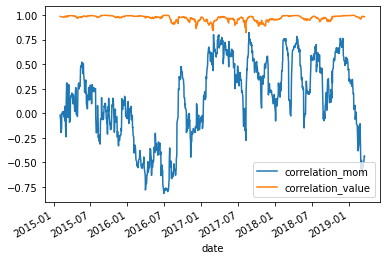

In [52]:
# Plot the correlations
df['correlation_mom'].plot()
df['correlation_value'].plot()
plt.legend()
plt.show()

# you've looked at the S&P500 exposures, and see that there is a large consistent exposure to the value factor,
# but a very fluctuating correlation to momentum.

In [53]:
# lets see the correlation with our portfolio
factor_data = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\portfolio and factors.xlsx",
                             parse_dates=['date'], index_col='date')
factor_data

,momentum,value,portfolio
date,,,
2016-01-04,-1.69,-1.53,-1.651745
2016-01-05,0.38,0.10,0.408161
2016-01-06,1.27,-1.22,0.325555
2016-01-07,0.21,-2.38,-0.698259
2016-01-08,-0.20,-0.91,-0.959352
...,...,...,...
2016-12-23,-0.35,0.07,0.438153
2016-12-27,0.14,0.27,0.430411
2016-12-28,0.08,-0.69,-0.903525


In [54]:
# Calculate the pairwise correlation
factor_data.corr()

,momentum,value,portfolio
momentum,1.000000,-0.363237,0.001012
value,-0.363237,1.000000,0.767663
portfolio,0.001012,0.767663,1.000000


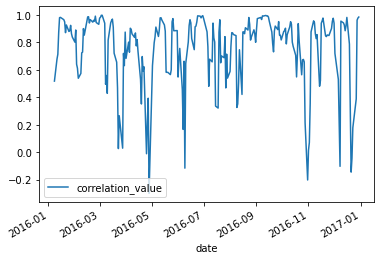

In [55]:
# Calculate the pairwise correlation
factor_data.corr()

# Calculate rolling 5 day correlation 
factor_data['correlation_value']=factor_data['portfolio'].rolling(5).corr(factor_data['value'])

# Plot the rolling correlation
factor_data['correlation_value'].plot()
plt.legend()
plt.show()

In [56]:
# using linear regression model to create a Farma Frecnh model:
# lets see the correlation with our portfolio
factor_returns = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\portfolio and fama frecnh factors.xlsx",
                             parse_dates=['date'], index_col='date')
factor_returns

,Mkt-RF,SMB,HML,RF,pf_returns
date,,,,,
2016-01-04,-1.59,-0.83,0.53,0.000,-1.651745
2016-01-05,0.12,-0.22,0.01,0.000,0.408161
2016-01-06,-1.35,-0.12,0.00,0.000,0.325555
2016-01-07,-2.44,-0.29,0.08,0.000,-0.698259
2016-01-08,-1.11,-0.47,-0.03,0.000,-0.959352
...,...,...,...,...,...
2016-12-23,0.19,0.56,-0.52,0.001,0.438153
2016-12-27,0.27,0.21,0.13,0.001,0.430411
2016-12-28,-0.87,-0.27,0.08,0.001,-0.903525


In [57]:
# In this exercise you want to check how much correlation your portfolio returns have with the Fama French factors.
# With a quick correlation table, you can very easily gain insight into how your portfolio returns move with for 
# example the excess market return or the size and value factors.

# Print the correlation table 
print(factor_returns.corr())

              Mkt-RF       SMB       HML        RF  pf_returns
Mkt-RF      1.000000  0.331250  0.099800  0.087073    0.738586
SMB         0.331250  1.000000 -0.108081  0.076750    0.162303
HML         0.099800 -0.108081  1.000000 -0.049019   -0.237647
RF          0.087073  0.076750 -0.049019  1.000000    0.039383
pf_returns  0.738586  0.162303 -0.237647  0.039383    1.000000


<AxesSubplot:>

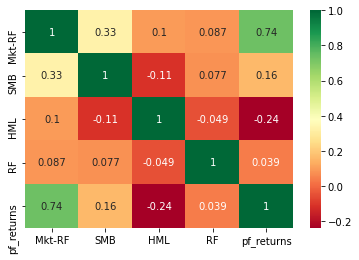

In [58]:
sns.heatmap(factor_returns.corr(), annot = True, cmap = 'RdYlGn')

In [59]:
# Based on what you see in the above correlation table, do you think this portfolio manager has strong 
# strategic investment skills?
# No, the performance of this portfolio can largely be explained by market returns, but not so much by factor returns.

In [60]:
import statsmodels.api as sm
# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

In [61]:
# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']])
predictions

date
2016-01-04   -1.376476
2016-01-05    0.143971
2016-01-06   -1.084384
2016-01-07   -1.981920
2016-01-08   -0.792760
                ...   
2016-12-23    0.280174
2016-12-27    0.111880
2016-12-28   -0.693659
2016-12-29    0.087132
2016-12-30   -0.499718
Length: 252, dtype: float64

In [62]:
# Print out the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):                    1.55e-57
Time:                        23:05:12   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.8234      0.040     20.627      0.000       0.745       0.902
SMB           -0.2272      0.064     -3.545      0.000      -0.353      -0.101
HML           -0.4826      0.056     -8.611      0.000      -0.593      -0.372
==============================================================================
Omnibus:                      143.224   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1746.553
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      15.279   Cond. No.                         1.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# we can get only coefs if we dont want the whole summary
# Obtain the beta coefficients
b1, b2, b3 = model.params

# Print the betas
print ('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227199
HML: -0.482598


In [64]:
# what is back testing:
# back testing is to run your strategy on historic data and see how it would have performed, if you would
# have traded it over that histpric time period. it gives and estimate for risk and return numbers for the future
# however, warning, be very careful with extrapolating back-test results to the futues, one strategy that has worked
# historially well, it not guaranteed to continue its success in the fuutre, because the underlying market can and 
# will change. for example they can become more volatile.So a good back-test in never a guarantee for string future 
# performance. 
# (like what we did in our low vol strategy in the investment course)

# You'll see that the elaborate calculations you've done in previous chapters, can very quickly be generated with this simple tear sheet, and by inputting just the returns data. In that sense,
# this tear sheet can save you a lot of time!

In [65]:
# creating tear sheet (fund fact sheet) using pyfolio
# Import the package
import pyfolio as pf

C:\Users\sasan\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [66]:
returns_sp500 = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\sp500 for pyfolio.xlsx",
                             parse_dates=['date'], index_col='date')
# when using data for pyfolio make sure your date is index and is datetime type, otherwise you get error
#  if not you can use this: returns_sp500.index = pd.to_datetime(returns_sp500.index)
returns_sp500.head()

,S&P500
date,
2015-01-02,0.000000
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888


In [67]:
returns_sp500.index=pd.to_datetime(returns_sp500.index)

In [68]:
# returns_sp500 is currently a Pandas DataFrame. Transform it into a Pandas Series by taking 
# only the S&P500 column and assigning that to a new series called returns.
returns = pd.Series(returns_sp500['S&P500'])
type(returns)

pandas.core.series.Series

Start date,2015-01-02
End date,2019-03-19
Total months,50
,Backtest
Annual return,7.896%
Cumulative returns,37.624%
Annual volatility,13.662%
Sharpe ratio,0.62
Calmar ratio,0.40
Stability,0.85
Max drawdown,-19.778%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.78,2018-09-20,2018-12-24,NaT,NaN
1,14.16,2015-05-21,2016-02-11,2016-07-11,298
2,10.16,2018-01-26,2018-02-08,2018-08-24,151
3,4.79,2016-08-15,2016-11-04,2016-11-21,71
4,3.64,2015-03-02,2015-03-11,2015-04-24,40


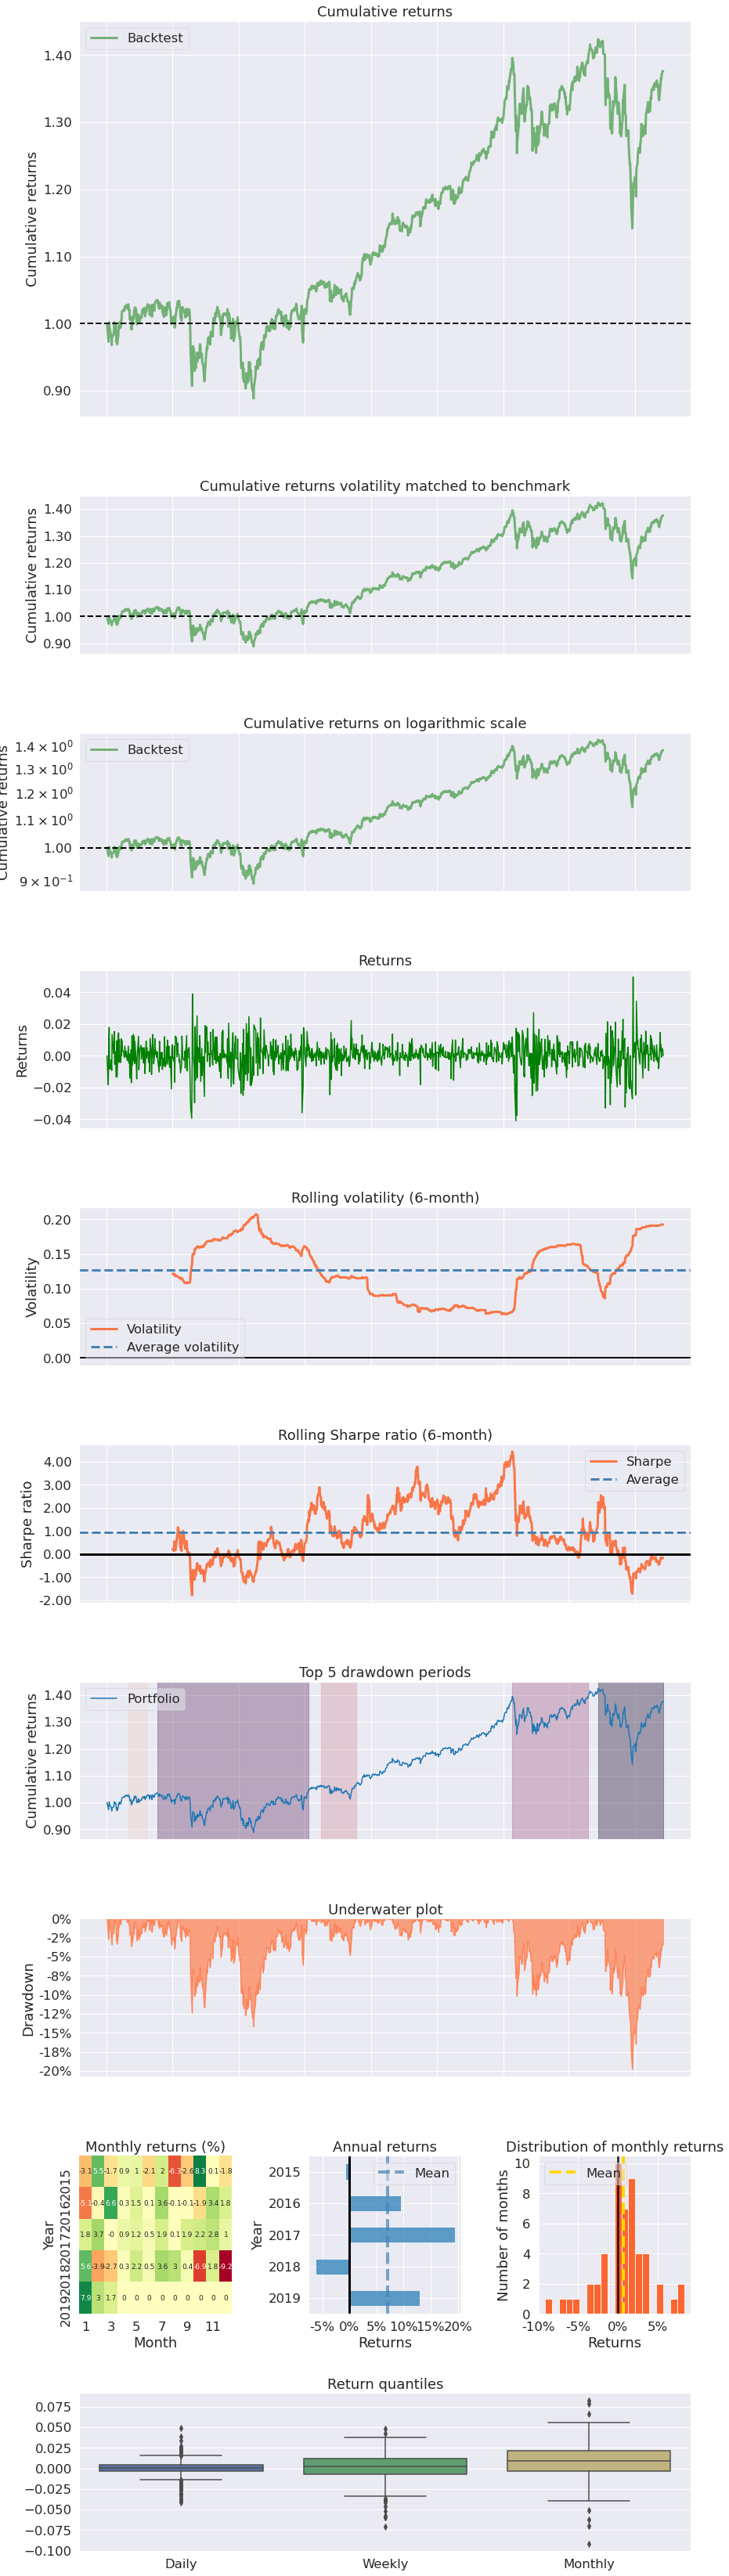

In [72]:
# Create the returns tear sheet
fig = pf.create_returns_tear_sheet(returns, return_fig=True)
# Display a zoomed in version of the tear sheet
# display_tear_sheet()

In [73]:
# Define the sector mappings
sect_map = {'COST': 'Consumer Goods',
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}
pf.create_position_tear_sheet(returns, positions,
sector_mappings=sect_map)


NameError: name 'positions' is not defined

In [142]:
# Import the packages 
import pypfopt 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier


In [155]:
stock_prices = pd.read_excel("F:\\schulich\\datacamp\\python finance fundamentals\\6-Introduction to Portfolio Analysis in Python\\stock_prices-4 company.xlsx",
                            parse_dates=['date'], index_col='date')
stock_prices.head()

,GE,GPM,MSF,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [203]:
# we calculate what we did before at the begining of this jupyter notebook but this time using library which is easier
# Calculate expected returns mu 
c

GE    -0.175812
GPM    0.185643
MSF    0.223083
PG    -0.045684
dtype: float64

In [204]:
# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)
Sigma

,GE,GPM,MSF,PG
GE,0.046355,0.023011,0.016415,0.010182
GPM,0.023011,0.047033,0.024328,0.010899
MSF,0.016415,0.024328,0.054486,0.014257
PG,0.010182,0.010899,0.014257,0.020810


In [179]:
# Get the returns from the stock price data
returns=stock_prices.pct_change()
returns

,GE,GPM,MSF,PG
date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555
2015-01-07,0.000415,0.001526,0.012705,0.005246
2015-01-08,0.012043,0.022346,0.029418,0.011436
...,...,...,...,...
2018-03-21,0.017595,0.000872,-0.006979,-0.016218
2018-03-22,-0.038184,-0.041747,-0.029087,-0.008178
2018-03-23,-0.020974,-0.026739,-0.029068,-0.006544


In [180]:
# Calculate the annualized covariance matrix 
# as you see it is the same as what we caluculated above from the prices using pypfopt library.
covMatrix = returns.cov()*252
covMatrix

,GE,GPM,MSF,PG
GE,0.046355,0.023011,0.016415,0.010182
GPM,0.023011,0.047033,0.024328,0.010899
MSF,0.016415,0.024328,0.054486,0.014257
PG,0.010182,0.010899,0.014257,0.020810


In [205]:
# Obtain the efficient frontier
ef = EfficientFrontier(mu, Sigma)
ef

In [194]:
# Let's now continue with the efficient frontier ef that you calculated in a previous exercise for the small portfolio.
# You still need to select an optimal portfolio from that efficient frontier ef, and check its performance. 
# Let's use the efficient_return option. This function selects the portfolio with the minimized risk given a 
# target return. A portfolio manager is often asked to manage a portfolio under certain risk and return constraints,
# so this is a very useful function for that.

In [195]:
# Select an optimal return for a target risk
target_risk = 2.3 # stdev = 23%
weights_target_risk = ef.efficient_risk(target_risk)
weights_target_risk

OrderedDict([('GE', 3.715507e-10),
             ('GPM', 4.0759155e-09),
             ('MSF', 0.999999995042934),
             ('PG', 5.095728e-10)])

In [196]:
# see the performance of given risk target portfolio
rfr = 0
ef.portfolio_performance(verbose=True, risk_free_rate = rfr)

Expected annual return: 22.3%
Annual volatility: 23.3%
Sharpe Ratio: 0.96


(0.22308343159458832, 0.2334230253358659, 0.9557044823388772)

In [197]:
# Get the minimum risk portfolio for a target return 
target_return = 0.2   # 0.2 = 20%

weights = ef.efficient_return(target_return)
weights

OrderedDict([('GE', 4.964355e-10),
             ('GPM', 0.4926481964737801),
             ('MSF', 0.4900931009824031),
             ('PG', 0.0172587020485885)])

In [198]:
# the above weights are not so clean, you can use clean weights to make them more clean and understandable
weights_cleaned = ef.clean_weights()
weights_cleaned

OrderedDict([('GE', 0.0), ('GPM', 0.49265), ('MSF', 0.49009), ('PG', 0.01726)])

In [199]:
# Show portfolio performance 
rfr = 0
ef.portfolio_performance(verbose=True, risk_free_rate = rfr)

Expected annual return: 20.0%
Annual volatility: 19.2%
Sharpe Ratio: 1.04


(0.20000000009678887, 0.1915266699512147, 1.0442409934226522)

In [200]:
# Select the maximum Sharpe portfolio
rfr = 0
weights_max_sharepe = ef.max_sharpe(risk_free_rate= rfr)
weights_max_sharepe

OrderedDict([('GE', 1.84401e-10),
             ('GPM', 0.4396020264639606),
             ('MSF', 0.5603979727524437),
             ('PG', 5.99193e-10)])

In [201]:
# see the performance of maximum sharpe ratio portfolio
rfr = 0
ef.portfolio_performance(verbose=True, risk_free_rate = rfr)

Expected annual return: 20.7%
Annual volatility: 19.5%
Sharpe Ratio: 1.06


(0.2066246429583687, 0.19541424918905262, 1.0573673302527218)

In [206]:
# you can get the minimum volatility portfolio
weights_min_volatility = ef.min_volatility()
weights_min_volatility

OrderedDict([('GE', 0.1573217875054168),
             ('GPM', 0.117142142133372),
             ('MSF', 0.0470376255528437),
             ('PG', 0.6784984448083675)])

In [207]:
# see the performance of min volatility ratio portfolio
rfr = 0
ef.portfolio_performance(verbose=True, risk_free_rate = rfr)

Expected annual return: -2.6%
Annual volatility: 13.3%
Sharpe Ratio: -0.20


(-0.026415861751657256, 0.13292386607830184, -0.19872926157667117)

In [209]:
# better estimating for expected return and expected volatility
# using historic return gives the same weights to all observations, regardless of their time
# but a better way is to gives higher weight to most recent data
# using exponential function we can define how much weight should be assigned to which time
# exponential mean works like moving average

In [217]:
# we can easily calculate exponentially weighted moving average
# span: lookback window over which you calculate the return
# frecquency: the number of trading days in a year
mu_ema = expected_returns.ema_historical_return(stock_prices, span = 180, frequency=252)
mu_ema

GE    -0.593308
GPM    0.172294
MSF    0.285390
PG    -0.241595
Name: 2018-03-27 00:00:00, dtype: float64

In [211]:
# similarly we can caluclate exponentially weighted covariance
# the span does not necessarily need to be the same as span for exponentially moving average return
sigma_ex = risk_models.exp_cov(stock_prices, span=180, frequency=252)
sigma_ex

,GE,GPM,MSF,PG
GE,0.089302,0.026028,0.013672,0.009110
GPM,0.026028,0.045717,0.034885,0.009699
MSF,0.013672,0.034885,0.067528,0.009651
PG,0.009110,0.009699,0.009651,0.022898


In [215]:
# we can get a more reliable efficient frontier which is more consistent with the most recent data
ef = EfficientFrontier(mu_ema, sigma_ex)
ef

In [216]:
# lets for exmaple het the weight for maximum sharpe ratio
rfr = 0
weights_max_sharepe = ef.max_sharpe(risk_free_rate= rfr)
print(weights_max_sharepe)
ef.portfolio_performance(verbose=True, risk_free_rate = rfr)

OrderedDict([('GE', 0.0), ('GPM', 0.1926271296313854), ('MSF', 0.8073728703686145), ('PG', 0.0)])
Expected annual return: 26.4%
Annual volatility: 23.8%
Sharpe Ratio: 1.11


(0.26360441503021814, 0.23783464413629896, 1.1083516280292243)

In [219]:
# using downside risk in performance optimization
# this approach is similar to sortio ratio where we just care about negative returns
# in PyPortfolioOpt we can do the same and get the variance of only negative returns
# it is called semi-covariance
# benchmark = 0 means taking returns below 0% into account. 
sigma_semi = risk_models.semicovariance(stock_prices, benchmark=0, frequency=252)
sigma_semi

,GE,GPM,MSF,PG
GE,0.025121,0.014013,0.012002,0.008231
GPM,0.014013,0.021684,0.013961,0.008114
MSF,0.012002,0.013961,0.023460,0.009030
PG,0.008231,0.008114,0.009030,0.011152


In [ ]:
# and we can use this sigma in our portfolio optimazation.